___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
from numba import jit, cuda 
# to measure exec time 
from timeit import default_timer as timer 
from sklearn.preprocessing import MinMaxScaler
from category_encoders import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings("ignore")
					 

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [6]:
# jit(target_backend='cuda')
data_FEMALE= pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr",encoding='latin-1')
data_MALE= pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")


## Explore Data

In [7]:
new_df=pd.concat([data_FEMALE,data_MALE])

In [8]:
new_df.select_dtypes(include=['object']).columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference'],
      dtype='object')

In [9]:
new_df['SubjectId']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1981     29501.0
1982     29502.0
1983     29503.0
1984     29511.0
1985    920103.0
Name: SubjectId, Length: 6068, dtype: float64

In [10]:
new_df['Ethnicity']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1981    Mexican
1982    Mexican
1983        NaN
1984    Mexican
1985    Mexican
Name: Ethnicity, Length: 6068, dtype: object

## Ethnicity have alot of null values

In [11]:
new_df['Ethnicity'].isnull().sum()

4647

In [12]:
new_df['PrimaryMOS'].value_counts() #– Primary Military Occupational Specialty

PrimaryMOS
11B     671
88M     320
92A     288
91B     230
68W     222
       ... 
15D       1
25G       1
915E      1
19B       1
76B       1
Name: count, Length: 285, dtype: int64

In [13]:
new_df.Component.value_counts()

Component
Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: count, dtype: int64

In [14]:
new_df.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
                                  ... 
Age                                  0
Heightin                             0
Weightlbs                            0
WritingPreference                    0
SubjectId                         4082
Length: 109, dtype: int64

In [15]:

# new_df['Ethnicity'].str.split(' ').str[-1].unique()
# new_df['Ethnicity']=new_df['Ethnicity'].str.split(' ').str[-1]
# new_df.Ethnicity.value_counts()
###############
# other_Ethnicity=(new_df.Ethnicity.value_counts()<= 20)
# new_df['Ethnicity'] = new_df['Ethnicity'].replace(other_Ethnicity[other_Ethnicity].index, 'Other')


# Remove unnecessary columns

In [16]:
new_df=new_df.drop(['subjectid','WritingPreference' , 'PrimaryMOS', 'Heightin' , 
                    'Weightlbs' , 'Date' , 'Age' , 'SubjectId' , 'Ethnicity'] , axis=1)

# 'subjectid','WritingPreference' , 'PrimaryMOS', 'Heightin' , 'Weightlbs' , 'Date' , 'Age' , 'SubjectId' , 'Ethnicity'

In [17]:
new_df.isnull().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
                                 ..
Component                         0
Branch                            0
SubjectsBirthLocation             0
SubjectNumericRace                0
DODRace                           0
Length: 100, dtype: int64

# Drop DODRace class if value count below 500 

In [18]:
drop_model = new_df.DODRace.value_counts()[new_df.DODRace.value_counts() <= 500].index
# drop_model
for i in drop_model:
    drop_index = new_df[new_df['DODRace'] == i].index
    # df.drop(index = drop_index, inplace=True)
    new_df=new_df.drop(index = drop_index)

new_df.reset_index(drop=True)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Installation,Component,Branch,SubjectsBirthLocation,SubjectNumericRace,DODRace
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Fort Hood,Regular Army,Combat Arms,North Dakota,1,1
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Fort Hood,Regular Army,Combat Support,New York,1,1
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Fort Hood,Regular Army,Combat Support,New York,2,2
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Fort Hood,Regular Army,Combat Service Support,Wisconsin,1,1
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Fort Hood,Regular Army,Combat Service Support,North Carolina,2,2
...,...,...,...,...,...,...,...,...,...,...,..

In [19]:
new_df['DODRace'].value_counts()

DODRace
1    3669
2    1261
3     659
Name: count, dtype: int64

In [20]:
new_df['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
California       402
New York         400
Texas            370
Indiana          255
Florida          203
                ... 
Belarus            1
New Zealand        1
South America      1
Guatemala          1
Denmark            1
Name: count, Length: 134, dtype: int64

# Edit Subject Birth Location

In [21]:
states_only = ['California', 'New York', 'Texas', 'Indiana', 'Oklahoma', 'Illinois',
          'Florida', 'Minnesota', 'Michigan', 'Mississippi', 'Georgia', 'Alabama',
          'South Carolina', 'North Carolina', 'Ohio', 'Louisiana', 'Pennsylvania',
          'Virginia', 'Massachusetts', 'Wisconsin', 'New Jersey', 'Missouri',
          'Arizona', 'Colorado', 'Maryland', 'Tennessee', 'Kentucky', 'Washington',
          'Kansas', 'South Dakota', 'Iowa', 'Arkansas', 'Oregon', 'Connecticut',
          'Nebraska', 'Hawaii', 'Utah', 'West Virginia', 'Nevada', 'Idaho', 'Rhode Island',
          'Maine', 'North Dakota', 'New Mexico', 'Delaware',
          'New Hampshire', 'Vermont', 'Montana', 'Alaska', 'Wyoming', 'United States']

new_df['SubjectsBirthLocation'] = new_df.SubjectsBirthLocation.replace(states_only, 'United States')

In [22]:
new_df['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
United States    5071
Germany            90
Puerto Rico        86
Mexico             37
Jamaica            34
                 ... 
Togo                1
Ivory Coast         1
Belarus             1
New Zealand         1
Denmark             1
Name: count, Length: 84, dtype: int64

In [23]:
other_BirthLocation=(new_df.SubjectsBirthLocation.value_counts()<= 20)
new_df['SubjectsBirthLocation'] = new_df['SubjectsBirthLocation'].replace(other_BirthLocation[other_BirthLocation].index, 'Other')
new_df['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
United States    5071
Other             271
Germany            90
Puerto Rico        86
Mexico             37
Jamaica            34
Name: count, dtype: int64

-------------

In [24]:
new_df.duplicated().sum()

0

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5589 entries, 0 to 1985
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5589 non-null   int64 
 1   acromialheight                  5589 non-null   int64 
 2   acromionradialelength           5589 non-null   int64 
 3   anklecircumference              5589 non-null   int64 
 4   axillaheight                    5589 non-null   int64 
 5   balloffootcircumference         5589 non-null   int64 
 6   balloffootlength                5589 non-null   int64 
 7   biacromialbreadth               5589 non-null   int64 
 8   bicepscircumferenceflexed       5589 non-null   int64 
 9   bicristalbreadth                5589 non-null   int64 
 10  bideltoidbreadth                5589 non-null   int64 
 11  bimalleolarbreadth              5589 non-null   int64 
 12  bitragionchinarc                5589 non-null   int6

## Outliers

In [26]:
from ipywidgets import interact
def box_m(model):
    sns.boxplot(data = new_df, x= "DODRace", y = model)
interactive_df = new_df.columns[new_df.columns != 'DODRace']
interact(box_m, model=interactive_df);

interactive(children=(Dropdown(description='model', options=('abdominalextensiondepthsitting', 'acromialheight…

In [27]:
def get_outliers(col):

    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR
    return lower_lim,upper_lim

# According to the 1.5 wisker value, we identify the data that we consider to be outliers belonging to each group.
outliers = {}
for i in new_df.select_dtypes(include="int").columns:
    if i != 'DODRace':
        l, u = get_outliers(new_df[i])
        outliers[i] = [l, u]

In [28]:
df_noutliers = new_df.copy(deep = True)
for i in df_noutliers.select_dtypes(include="int").columns:
    if i != 'DODRace':
        df_noutliers.drop(df_noutliers[(df_noutliers[i] > outliers[i][1]) |
                           (df_noutliers[i] < outliers[i][0] )].index, inplace=True)


In [29]:
len(new_df)-len(df_noutliers)

2182

In [30]:
new_df.DODRace

0       1
1       1
2       2
3       1
4       2
       ..
1981    3
1982    3
1983    2
1984    3
1985    3
Name: DODRace, Length: 5589, dtype: int64

In [31]:
new_df['DODRace'].replace([1,2,3],['White','Black','Hispanic'])

0          White
1          White
2          Black
3          White
4          Black
          ...   
1981    Hispanic
1982    Hispanic
1983       Black
1984    Hispanic
1985    Hispanic
Name: DODRace, Length: 5589, dtype: object

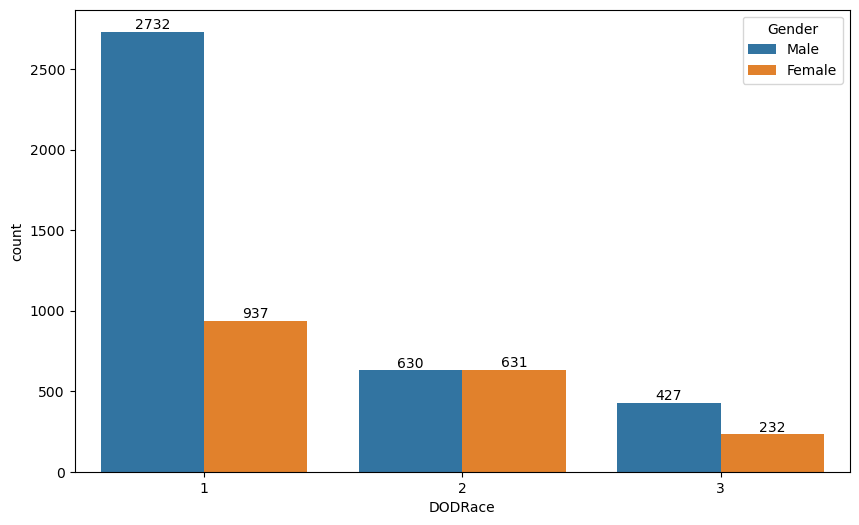

In [32]:
ax = sns.countplot(x="DODRace", hue="Gender", data = new_df)
for p in ax.containers:
    ax.bar_label(p)

# distrubutions among gender

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [33]:
# In this step we divide the data to X(Features) and y(Target) 
x=new_df.drop(columns='DODRace')
y=new_df.DODRace
print("x : ", x.shape)
print("y : ", y.shape)

x :  (5589, 99)
y :  (5589,)


In [34]:
# new_df.Gender=new_df.Gender.replace(['Male','Female'],[0,1])
# new_df.Gender

In [35]:
# To train and evaluation purposes I create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,stratify=y)
y_test=y_test.replace([1,2,3],['White','Black','Hispanic'])
y_train=y_train.replace([1,2,3],['White','Black','Hispanic'])
y_train

590     Hispanic
516        White
994        Black
462        White
3836       White
          ...   
1454       Black
3867       White
1972       White
596        White
1685       White
Name: DODRace, Length: 4471, dtype: object

In [36]:
cats=list(new_df.select_dtypes(include=['object']).columns)
cats

['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation']

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# scale the data
scaler = MinMaxScaler()
# column transformer
cats=['Gender', 'Installation', 'Component', 'Branch','SubjectsBirthLocation']
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore",sparse=False), cats ),
                        remainder='passthrough',
                        # verbose_feature_names_out=False)
                        #  remainder=MinMaxScaler(),
    verbose_feature_names_out=False)
# column_trans=column_trans.set_output(transform="pandas")


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, pair_confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    # print("\tTest_Set\n")
    # print()
    # print(classification_report(y_test, y_pred))
    # print()
    
    # print("\tTrain_Set\n")
    # print()
    # print(classification_report(y_train, y_train_pred))
    print(f'''
-----------------------------Test Results-----------------------------
{classification_report(y_test, y_pred)}
                        
-----------------------------Train Results-----------------------------
{classification_report(y_train, y_train_pred)}''')

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [39]:
operations = [("OneHot_Encoder", column_trans),
               ("scaler", scaler),
               ("logistic", LogisticRegression()),]

pipe_model_LR = Pipeline(steps=operations)
pipe_model_LR.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic', LogisticRegression())])

In [127]:
eval_metric(pipe_model_LR,X_train,y_train,X_test,y_test)


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.93      0.89      0.91       252
    Hispanic       0.70      0.45      0.55       132
       White       0.89      0.96      0.93       734

    accuracy                           0.89      1118
   macro avg       0.84      0.77      0.80      1118
weighted avg       0.88      0.89      0.88      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1009
    Hispanic       0.82      0.41      0.55       527
       White       0.89      0.97      0.93      2935

    accuracy                           0.89      4471
   macro avg       0.88      0.77      0.80      4471
weighted avg       0.89      0.89      0.88      4471



## Cross Validate for 3 (Hispanic) class

In [57]:

from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score


f1_Hispanic = make_scorer(f1_score, labels =['Hispanic'],pos_label =1, average=None)
precision_Hispanic = make_scorer(precision_score, labels =['Hispanic'], pos_label =1,average=None)
recall_Hispanic = make_scorer(recall_score, labels =['Hispanic'],pos_label =1, average=None)

Hispanic_scoring = {"precision_Hispanic":precision_Hispanic, "recall_Hispanic":recall_Hispanic, "f1_Hispanic":f1_Hispanic}

In [72]:
from sklearn.model_selection import cross_validate
pipe_model_LR_cv = Pipeline(steps =operations)

scores = cross_validate(pipe_model_LR_cv, X_train, y_train, 
                        scoring = Hispanic_scoring, 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11));
df_scores

,fit_time,score_time,test_precision_Hispanic,train_precision_Hispanic,test_recall_Hispanic,train_recall_Hispanic,test_f1_Hispanic,train_f1_Hispanic
1,0.207674,0.022361,0.0,0.0,0.0,0.0,0.0,0.0
2,0.131056,0.018882,0.0,0.0,0.0,0.0,0.0,0.0
3,0.109947,0.013524,0.0,0.0,0.0,0.0,0.0,0.0
4,0.107746,0.024652,0.0,0.0,0.0,0.0,0.0,0.0
5,0.123796,0.010405,0.0,0.0,0.0,0.0,0.0,0.0
6,0.123006,0.016861,0.0,0.0,0.0,0.0,0.0,0.0
7,0.116740,0.013370,0.0,0.0,0.0,0.0,0.0,0.0
8,0.122824,0.014794,0.0,0.0,0.0,0.0,0.0,0.0
9,0.130975,0.015718,0.0,0.0,0.0,0.0,0.0,0.0
10,0.133044,0.014147,0.0,0.0,0.0,0.0,0.0,0.0


### Logistic Model GridsearchCV

In [73]:
pipe_model_LR.get_params()

{'memory': None,
 'steps': [('OneHot_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['Gender', 'Installation', 'Component',
                                     'Branch', 'SubjectsBirthLocation'])],
                     verbose_feature_names_out=False)),
  ('scaler', MinMaxScaler()),
  ('logistic', LogisticRegression())],
 'verbose': False,
 'OneHot_Encoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['Gender', 'Installation', 'Component',
                                   'Branch', 'SubjectsBirthLocation'])],
                   verb

In [215]:
from sklearn.model_selection import GridSearchCV

pipe_model_LR_GS = Pipeline(steps=operations)
penalty = ["l1", "l2"]
# C = [0.01, 0.1, 1, 3]
C = [3,7,10]
class_weight= ["balanced", None]
solver = [ "liblinear", "saga"]
# We can use class_weight="balanced" to balance classes in unbalanced data sets.
# When the data is balanced, the model tries to increase the recall score of that class by
# increasing the precision score of the less class.

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

grid_model1_lr = GridSearchCV(estimator=pipe_model_LR_GS,
                          param_grid=param_grid,
                          cv=10,
                          scoring = f1_Hispanic, 
                          n_jobs = -1,
                          return_train_score=True)
grid_model1_lr.fit(X_train, y_train)
best_accuracy_lr_h = grid_model1_lr.best_score_
best_paramaeter_lr_h = grid_model1_lr.best_params_  
print("Best hispanic f1-score of LR: {:.2f} %".format(best_accuracy_lr_h.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr_h) 


Best hispanic f1-score of LR: 58.79 %
Best Parameter of LR: {'logistic__C': 3, 'logistic__class_weight': 'balanced', 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}


In [216]:
eval_metric(grid_model1_lr, X_train, y_train, X_test, y_test)
#still not that good for class 3(Hispanic)


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       252
    Hispanic       0.66      0.59      0.62       132
       White       0.92      0.92      0.92       734

    accuracy                           0.88      1118
   macro avg       0.82      0.81      0.81      1118
weighted avg       0.88      0.88      0.88      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1009
    Hispanic       0.67      0.61      0.63       527
       White       0.93      0.93      0.93      2935

    accuracy                           0.90      4471
   macro avg       0.84      0.83      0.83      4471
weighted avg       0.89      0.90      0.89      4471



In [54]:
operations_bestLR = [("OneHot_Encoder", column_trans), 
                     ("scaler", scaler),
                     ("logistic",LogisticRegression(C = 3, penalty = 'l1', class_weight = 'balanced', solver = 'liblinear',max_iter=10000, random_state=101))]
pipe_lr_best = Pipeline(steps = operations_bestLR)
pipe_lr_best.fit(X_train, y_train)
eval_metric(pipe_lr_best, X_train, y_train, X_test, y_test)


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91       252
    Hispanic       0.62      0.58      0.60       132
       White       0.91      0.93      0.92       734

    accuracy                           0.88      1118
   macro avg       0.82      0.80      0.81      1118
weighted avg       0.88      0.88      0.88      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       0.91      0.94      0.92      1009
    Hispanic       0.66      0.59      0.62       527
       White       0.93      0.93      0.93      2935

    accuracy                           0.90      4471
   macro avg       0.83      0.82      0.83      4471
weighted avg       0.89      0.90      0.89      4471



In [58]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

y_pred_proba = pipe_lr_best.predict_proba(X_test)
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

y_pred = pipe_lr_best.predict(X_test)

LR_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
LR_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
LR_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

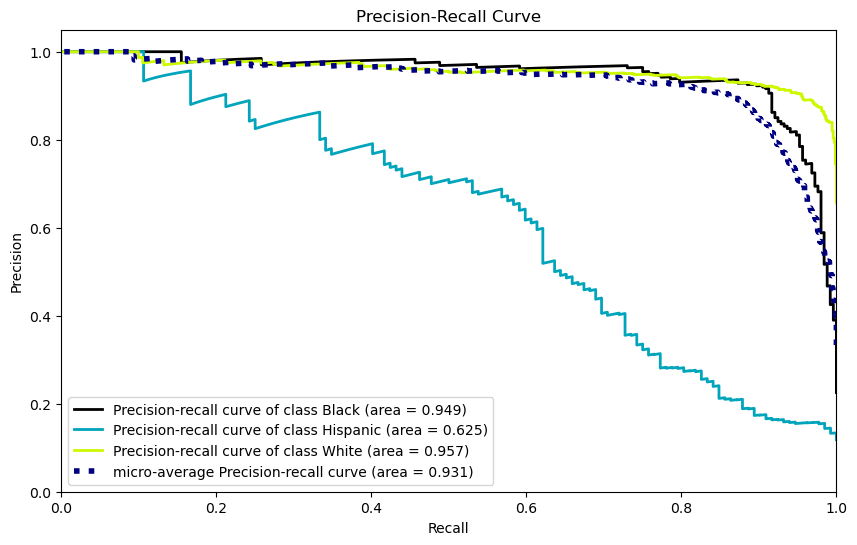

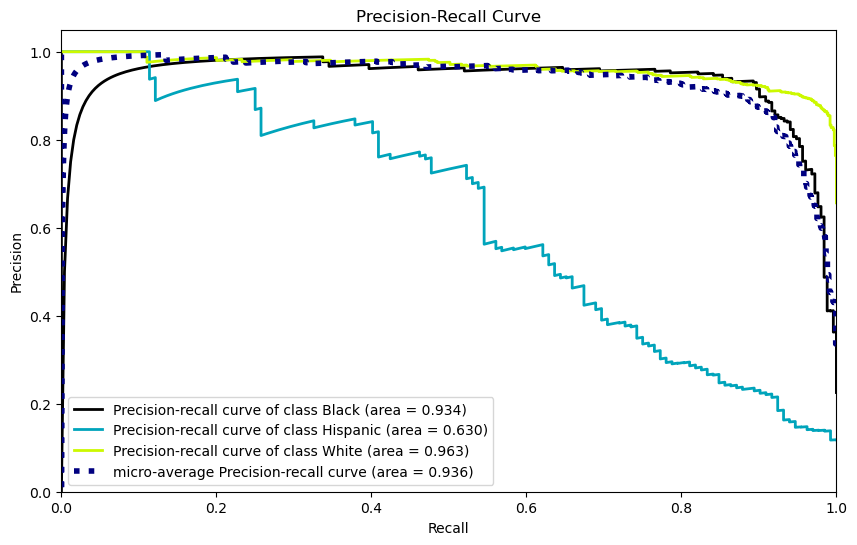

In [221]:
from scikitplot.metrics import plot_precision_recall
#plot_precision_recall of the GS and LR models


y_pred_proba = pipe_lr_best.predict_proba(X_test)
y_pred_proba_LR=pipe_model_LR.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plot_precision_recall(y_test, y_pred_proba_LR)

plt.show();


## 2. SVC

### Vanilla SVC model 

In [219]:
from sklearn.svm import SVC
operations_svc  = [("OneHot_Encoder", column_trans),
               ("scaler", scaler),
                  ("svc", SVC(class_weight="balanced", random_state=101,probability=True)),]

pipe_model_svc = Pipeline(steps=operations_svc)
pipe_model_svc.fit(X_train, y_train)

eval_metric(pipe_model_svc, X_train, y_train, X_test, y_test)




-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.89      0.90      0.90       252
    Hispanic       0.40      0.64      0.50       132
       White       0.92      0.82      0.87       734

    accuracy                           0.82      1118
   macro avg       0.74      0.79      0.75      1118
weighted avg       0.86      0.82      0.83      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1009
    Hispanic       0.51      0.82      0.63       527
       White       0.96      0.85      0.90      2935

    accuracy                           0.87      4471
   macro avg       0.80      0.87      0.82      4471
weighted avg       0.90      0.87      0.88      4471



Class Hispanic still have bad scores!!

###  SVC Model GridsearchCV

In [70]:
svm=SVC(class_weight="balanced", random_state=101)
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 101,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [222]:
cat = X_train.select_dtypes("object").columns

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder="passthrough",
    verbose_feature_names_out=False,
)
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("scaler", MinMaxScaler()),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]


model = Pipeline(steps=operations_svc)

# Define the parameter grid for GridSearchCV
param_grid = {'svc__C': [0.5, 1, 1.5],
              'svc__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
              'svc__gamma': ["scale", "auto"]}

svc_gs = GridSearchCV(
    model,
    param_grid,
    scoring=f1_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

# Fit the GridSearchCV object to the training data
svc_gs.fit(X_train, y_train)

# Get the best score and best parameters
best_accuracy_svc_gs = svc_gs.best_score_
best_parameter_svc_gs = svc_gs.best_params_

# Print the results
print("Best Hispanic f1-score of SVM: {:.2f}%".format(best_accuracy_svc_gs.mean() * 100))
print("Best Parameters of SVM:", best_parameter_svc_gs)

Best Hispanic f1-score of SVM: 54.74%
Best Parameters of SVM: {'svc__C': 0.5, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [60]:
from sklearn.svm import SVC
operations_best_svc  = [("OneHot_Encoder", column_trans),
               ("scaler", scaler),
                  ("svc", SVC(class_weight="balanced",C=1, gamma='scale', kernel='linear', random_state=101,probability=True)),]

best_model_svc = Pipeline(steps=operations_best_svc)
best_model_svc.fit(X_train, y_train)

eval_metric(best_model_svc, X_train, y_train, X_test, y_test)




-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.90      0.89      0.90       252
    Hispanic       0.46      0.78      0.58       132
       White       0.96      0.84      0.89       734

    accuracy                           0.84      1118
   macro avg       0.77      0.84      0.79      1118
weighted avg       0.88      0.84      0.86      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91      1009
    Hispanic       0.47      0.77      0.58       527
       White       0.95      0.84      0.89      2935

    accuracy                           0.85      4471
   macro avg       0.78      0.84      0.80      4471
weighted avg       0.89      0.85      0.86      4471



In [62]:
from sklearn.metrics import average_precision_score

# y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

y_pred_proba = best_model_svc.predict_proba(X_test)
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

y_pred = best_model_svc.predict(X_test)
y_pred = best_model_svc.predict(X_test)


decision_function = best_model_svc.decision_function(X_test)
svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

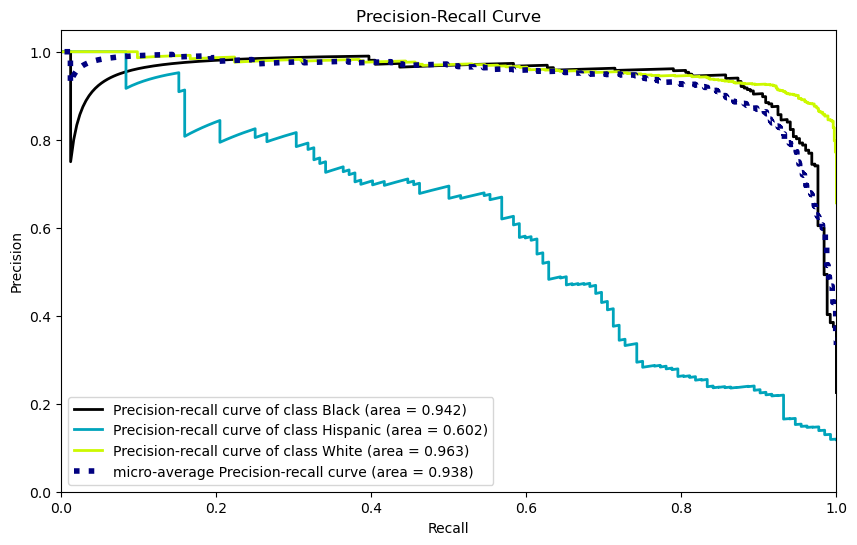

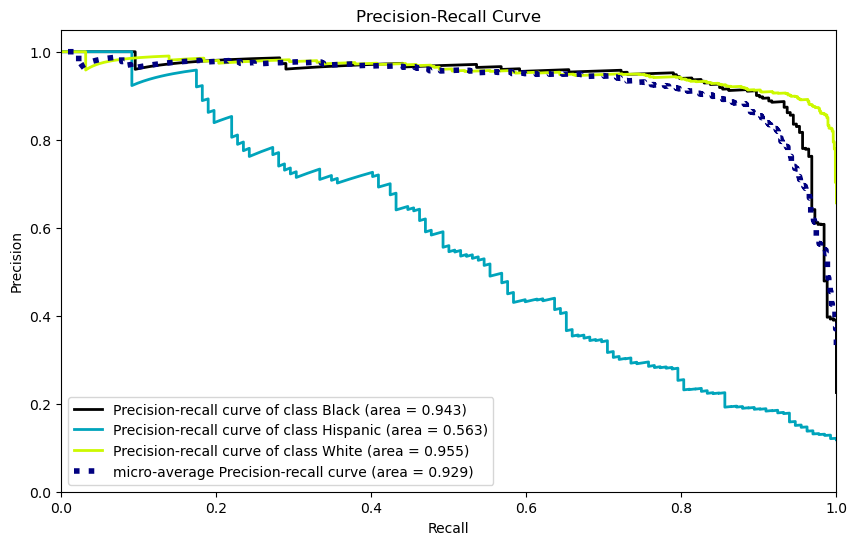

In [225]:
#plot_precision_recall of the GS and SVM models
y_pred_proba_best_svm = best_model_svc.predict_proba(X_test)
y_pred_proba_SVC=pipe_model_svc.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba_best_svm)
plot_precision_recall(y_test, y_pred_proba_SVC)

plt.show();


## 3. RF

### Vanilla RF Model

In [64]:
column_trans_trees = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cats),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [228]:
from sklearn.ensemble import RandomForestClassifier
operations_tree = [("OneHotEncoder", column_trans_trees),
              ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101))]

pipe_RF = Pipeline(steps=operations_tree)

pipe_RF.fit(X_train, y_train)
eval_metric(pipe_RF, X_train, y_train, X_test, y_test)




-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       252
    Hispanic       0.90      0.58      0.71       132
       White       0.93      0.98      0.96       734

    accuracy                           0.92      1118
   macro avg       0.91      0.83      0.86      1118
weighted avg       0.92      0.92      0.92      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1009
    Hispanic       1.00      1.00      1.00       527
       White       1.00      1.00      1.00      2935

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471



## it perform better now !!

## Cross Validate for 3 (Hispanic) class

In [150]:
from sklearn.model_selection import cross_validate
pipe_model_RF_cv = Pipeline(steps =operations_tree)

scores = cross_validate(pipe_model_RF_cv, X_train, y_train, 
                        scoring = Hispanic_scoring, 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11));
df_scores

,fit_time,score_time,test_precision_Hispanic,train_precision_Hispanic,test_recall_Hispanic,train_recall_Hispanic,test_f1_Hispanic,train_f1_Hispanic
1,3.383637,0.040947,0.773585,1.0,0.773585,1.0,0.773585,1.0
2,3.831683,0.046886,0.813953,1.0,0.673077,1.0,0.736842,1.0
3,4.223562,0.041288,0.780488,1.0,0.615385,1.0,0.688172,1.0
4,3.823947,0.039457,0.850000,1.0,0.653846,1.0,0.739130,1.0
5,4.129798,0.040263,0.760870,1.0,0.660377,1.0,0.707071,1.0
6,3.632413,0.015535,0.755556,1.0,0.641509,1.0,0.693878,1.0
7,3.533579,0.047835,0.787879,1.0,0.490566,1.0,0.604651,1.0
8,4.106418,0.031580,0.852941,1.0,0.547170,1.0,0.666667,1.0
9,3.577993,0.031958,0.820000,1.0,0.773585,1.0,0.796117,1.0
10,3.819625,0.031248,0.820513,1.0,0.603774,1.0,0.695652,1.0


### RF Model GridsearchCV

In [152]:
RF=RandomForestClassifier()
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [172]:
param_grid_RF = { "RF_model__n_estimators": [400, 500],
              # "RF_model__max_features":[3, 7, 10],
              "RF_model__max_depth": [ 2, 3],
              # 'RF_model__criterion': ["gini","entropy"],
            }


pipe_RF_GS = Pipeline(steps=operations_tree)

RF_GS = GridSearchCV(estimator=pipe_RF_GS,
                    param_grid=param_grid_RF,
                    scoring=f1_Hispanic,
                            n_jobs=-1
                            )

# Fit the GridSearchCV object to the training data
RF_GS.fit(X_train, y_train)

# Get the best score and best parameters
best_accuracy_RF_GS = RF_GS.best_score_
best_parameter_RF_GS = RF_GS.best_params_

# Print the results
print("Best Hispanic f1-score of RF: {:.2f}%".format(best_accuracy_RF_GS.mean() * 100))
print("Best Parameters of RF:", best_parameter_RF_GS)

Best Hispanic f1-score of RF: 68.48%
Best Parameters of RF: {'RF_model__max_depth': 3, 'RF_model__n_estimators': 500}


In [174]:
eval_metric(RF_GS, X_train, y_train, X_test, y_test)


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.90      0.79      0.84       252
    Hispanic       0.57      0.86      0.69       132
       White       0.99      0.94      0.96       734

    accuracy                           0.90      1118
   macro avg       0.82      0.86      0.83      1118
weighted avg       0.92      0.90      0.90      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       0.90      0.85      0.88      1009
    Hispanic       0.63      0.83      0.72       527
       White       0.99      0.95      0.97      2935

    accuracy                           0.91      4471
   macro avg       0.84      0.88      0.85      4471
weighted avg       0.93      0.91      0.92      4471



In [65]:
from sklearn.ensemble import RandomForestClassifier
operations_tree_best = [("OneHotEncoder", column_trans_trees),
              ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=101,max_depth= 3, n_estimators= 500))]

pipe_RF_best = Pipeline(steps=operations_tree_best)

pipe_RF_best.fit(X_train, y_train)
eval_metric(pipe_RF_best, X_train, y_train, X_test, y_test)




-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.88      0.82      0.85       252
    Hispanic       0.59      0.81      0.69       132
       White       0.98      0.94      0.96       734

    accuracy                           0.90      1118
   macro avg       0.82      0.86      0.83      1118
weighted avg       0.91      0.90      0.90      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       0.90      0.85      0.87      1009
    Hispanic       0.62      0.81      0.70       527
       White       0.98      0.95      0.96      2935

    accuracy                           0.91      4471
   macro avg       0.83      0.87      0.85      4471
weighted avg       0.92      0.91      0.91      4471



In [66]:
y_pred = pipe_RF_best.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

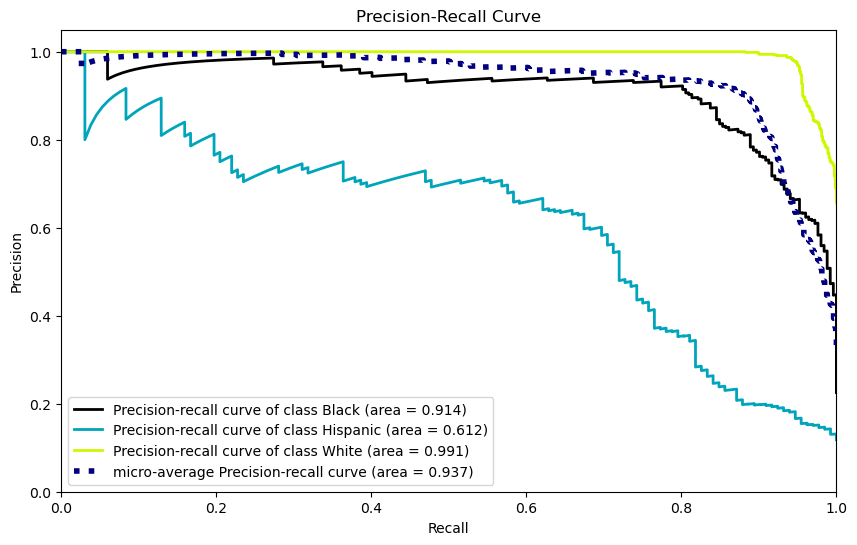

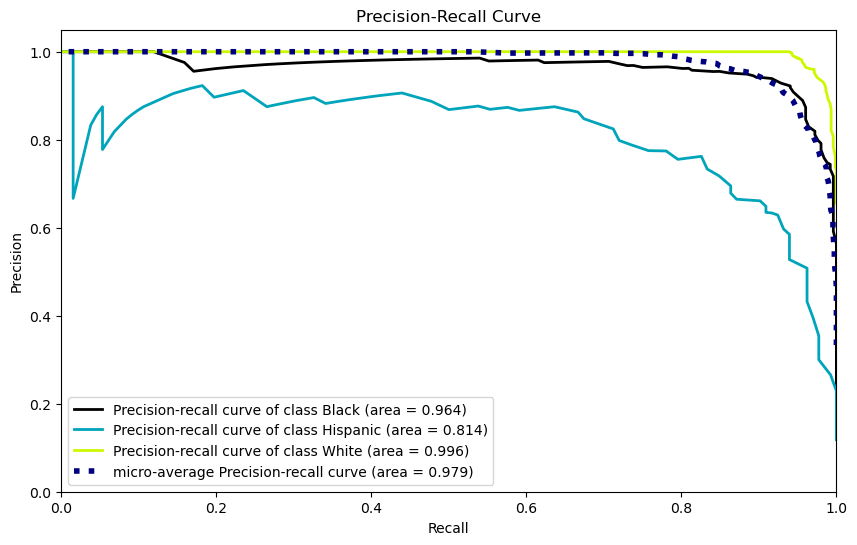

In [233]:
#plot_precision_recall of the GS and RF models
y_pred_proba_best_RF = pipe_RF_best.predict_proba(X_test)
y_pred_proba_RF=pipe_RF.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba_best_RF)
plot_precision_recall(y_test, y_pred_proba_RF)

plt.show();


## 4. XGBoost

### Vanilla XGBoost Model

In [76]:
y_train_XG = y_train.map({'White': 0, 'Black':1, 'Hispanic':2})
y_test_XG= y_test.map({'White': 0, 'Black':1, 'Hispanic':2})

In [71]:
import xgboost as xgb

xgb.__version__
from xgboost import XGBClassifier

In [237]:


operations_XG = [("OneHotEncoder", column_trans_trees),
              ("XG_model", XGBClassifier(random_state=101))]

XG_model = Pipeline(steps=operations_XG)

XG_model.fit(X_train, y_train_XG)
eval_metric(XG_model, X_train, y_train_XG, X_test, y_test_XG)



-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       734
           1       0.94      0.98      0.96       252
           2       0.94      0.89      0.92       132

    accuracy                           0.97      1118
   macro avg       0.96      0.95      0.95      1118
weighted avg       0.97      0.97      0.97      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2935
           1       1.00      1.00      1.00      1009
           2       1.00      1.00      1.00       527

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471



In [ ]:
from sklearn.model_selection import cross_validate
pipe_model_RF_cv = Pipeline(steps =operations)

scores = cross_validate(pipe_model_LR_cv, X_train, y_train, 
                        scoring = Hispanic_scoring, 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11));
df_scores

In [238]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight( class_weight="balanced", y=y_train_XG)
my_dict = {"weights": classes_weights, "label": y_train_XG}

comp = pd.DataFrame(my_dict)
comp.groupby("label").value_counts()


label  weights 
0      0.507780    2935
1      1.477040    1009
2      2.827957     527
Name: count, dtype: int64

### XGBoost Model GridsearchCV

In [241]:
XG=XGBClassifier(random_state=101)
XG.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 101,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [243]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=f1_Hispanic,
    cv=10,
    # verbose=2,
    n_jobs=-1,
    return_train_score=True,
)

In [245]:

# Fit the GridSearchCV object to the training data
xgb_grid_model.fit(X_train, y_train_XG)

# Get the best score and best parameters
best_accuracy_XG_GS = xgb_grid_model.best_score_
best_parameter_XG_GS = xgb_grid_model.best_params_

# Print the results
print("Best Hispanic f1-score of RF: {:.2f}%".format(best_accuracy_XG_GS.mean() * 100))
print("Best Parameters of RF:", best_parameter_XG_GS)

Best Hispanic f1-score of RF: 0.00%
Best Parameters of RF: {'XGB_model__colsample_bytree': 0.8, 'XGB_model__learning_rate': 0.03, 'XGB_model__max_depth': 1, 'XGB_model__n_estimators': 20, 'XGB_model__subsample': 0.8}


In [248]:
eval_metric(xgb_grid_model,X_train,y_train_XG,X_test,y_test_XG)


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       734
           1       0.91      0.85      0.87       252
           2       0.58      0.86      0.70       132

    accuracy                           0.91      1118
   macro avg       0.83      0.88      0.85      1118
weighted avg       0.93      0.91      0.91      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2935
           1       0.93      0.87      0.90      1009
           2       0.61      0.89      0.73       527

    accuracy                           0.92      4471
   macro avg       0.85      0.90      0.86      4471
weighted avg       0.94      0.92      0.92      4471



In [77]:
operations_XG_best = [("OneHotEncoder", column_trans_trees),
              ("XG_model", XGBClassifier(random_state=101,colsample_bytree= 0.8,learning_rate= 0.03, max_depth=1, n_estimators= 20, subsample= 0.8))]

XG_mode_best = Pipeline(steps=operations_XG_best)
XG_mode_best.fit(X_train,y_train_XG)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('XG_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=20,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [78]:
y_pred = XG_mode_best.predict(X_test)
y_test_xgb_dummies = pd.get_dummies(y_test_XG).values
xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_XG, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_XG, y_pred, average=None, labels=[1])

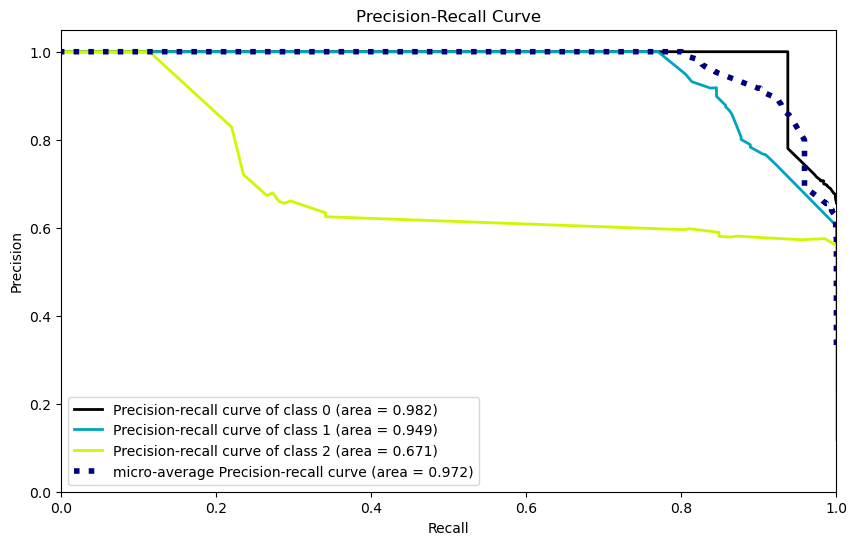

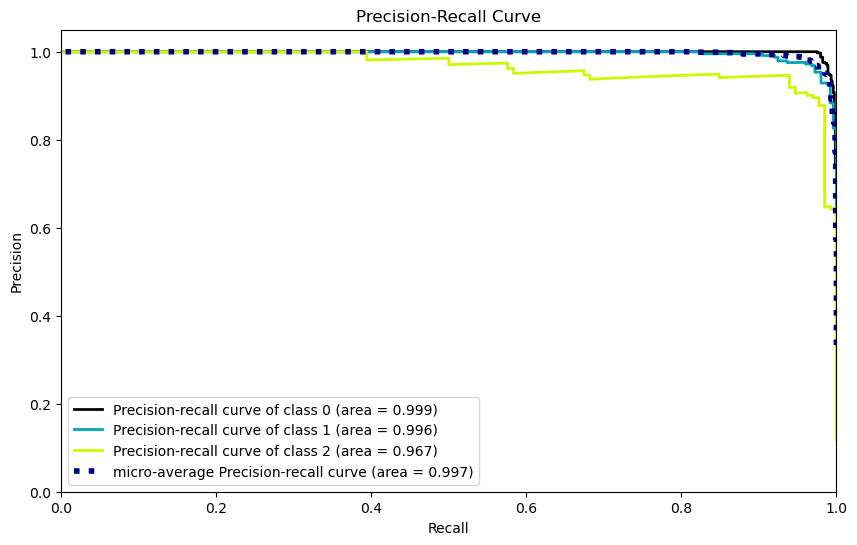

In [246]:
#plot_precision_recall of the GS and RF models
y_pred_proba_best_XG = xgb_grid_model.predict_proba(X_test)
y_pred_proba_XG=XG_model.predict_proba(X_test)

plot_precision_recall(y_test_XG, y_pred_proba_best_XG)
plot_precision_recall(y_test_XG, y_pred_proba_XG)

plt.show();


---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [3]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 22.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 544.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.1 MB 726.2 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/2.1 MB 1.0 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.1 MB 1.3 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.1 MB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.9/2.1 MB 2.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 3.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.9/2.1 MB 4.2 MB/s e

In [1]:
# check version number
import imblearn
# print(imblearn.__version__)

In [2]:
print((2935+1009+527)/3)

1490.3333333333333


In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from decimal import Underflow


In [43]:
y_train.value_counts()

DODRace
White       2935
Black       1009
Hispanic     527
Name: count, dtype: int64

In [45]:
column_trans_o_u = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cats),
    remainder=MinMaxScaler(),)

X_train_trans = column_trans_o_u.fit_transform(X_train)
over_s = SMOTE()
X_train_over, y_train_over = over_s.fit_resample(X_train_trans, y_train)
###########
under_s = RandomUnderSampler()
X_train_under, y_train_under = under_s.fit_resample(X_train_trans, y_train)
###########
over_num = SMOTE(sampling_strategy={"Black":1490,"Hispanic": 1490})
under_num = RandomUnderSampler(sampling_strategy={"White": 1490})

# With the sampling_strategy hyperparameter, we can increase or decrease
# the classes however we want.

In [46]:
y_train_over.value_counts()

DODRace
Hispanic    2935
White       2935
Black       2935
Name: count, dtype: int64

In [47]:
y_train_under.value_counts()

DODRace
Black       527
Hispanic    527
White       527
Name: count, dtype: int64

## Logistic Regression Over/ Under Sampling

In [49]:
operations = [
    ("OneHotEncoder", column_trans_o_u),
    ("o", over_s),
    ("u", under_s),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),]

smote_pipeline = imbpipeline(steps=operations)
smote_pipeline.fit(X_train,y_train)
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)


-----------------------------Test Results-----------------------------
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       252
    Hispanic       0.45      0.77      0.57       132
       White       0.95      0.83      0.89       734

    accuracy                           0.84      1118
   macro avg       0.77      0.83      0.79      1118
weighted avg       0.88      0.84      0.85      1118

                        
-----------------------------Train Results-----------------------------
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91      1009
    Hispanic       0.46      0.76      0.57       527
       White       0.95      0.83      0.89      2935

    accuracy                           0.84      4471
   macro avg       0.77      0.84      0.79      4471
weighted avg       0.88      0.84      0.86      4471



## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [51]:
from sklearn.metrics import matthews_corrcoef
# matthews_corrcoef?
y_train_pred = smote_pipeline.predict(X_train)
y_pred = smote_pipeline.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.7201149364981873

In [52]:
from sklearn.metrics import cohen_kappa_score
# cohen_kappa_score?
y_train_pred = smote_pipeline.predict(X_train)
y_pred = smote_pipeline.predict(X_test)
cohen_kappa_score(y_test, y_pred)

0.7087812942018779

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

## Comparing Models

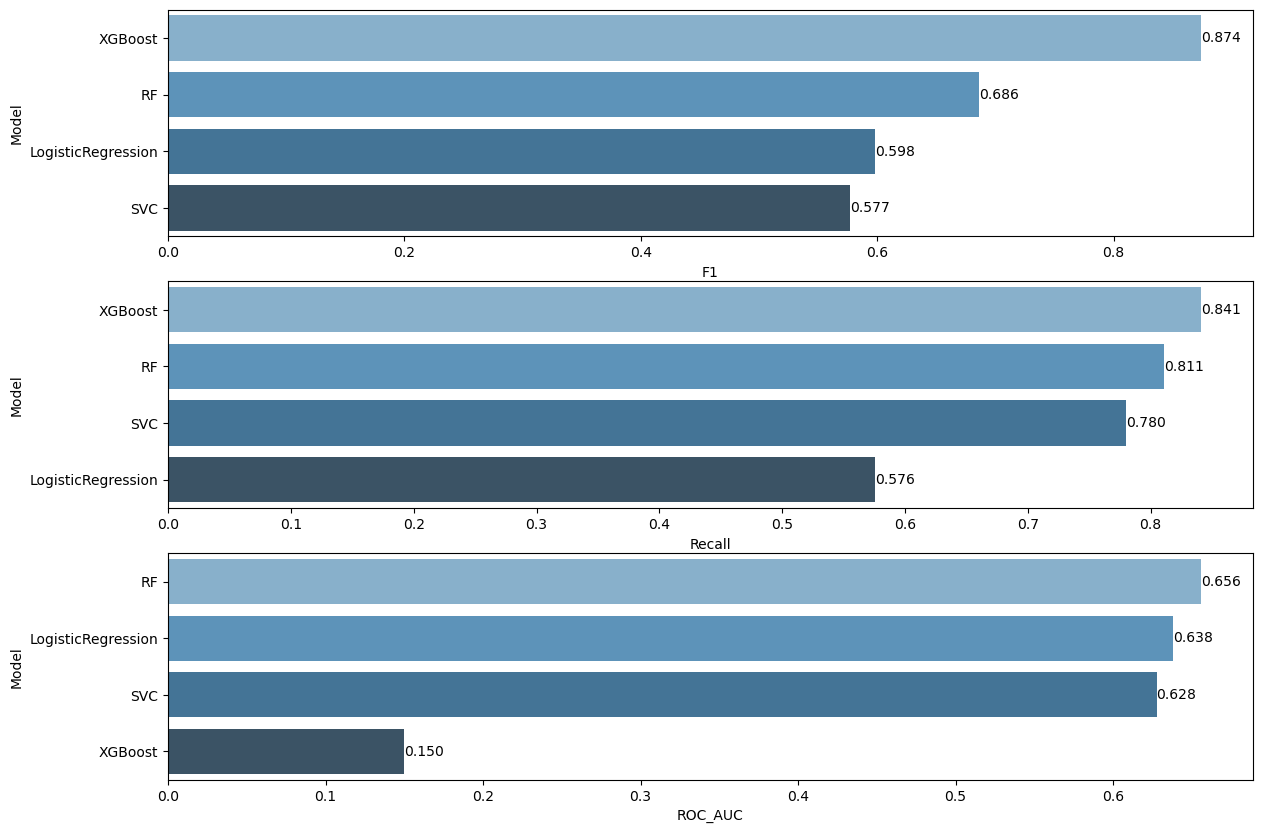

In [80]:
compare = pd.DataFrame({"Model": ["LogisticRegression","SVC","RF","XGBoost"],
                        "F1": [LR_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [LR_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "ROC_AUC": [LR_AP, svc_AP, rf_AP, xgb_AP],
    })


plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show()

# LR works best on the data

In [ ]:
# fit the best model with whole dataset to get better performance.
# And your model ready to deploy, dump your model and scaler.

In [82]:
cat = X_train.select_dtypes("object").columns

column_trans_best_model = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder="passthrough",
    verbose_feature_names_out=False,
)
operations_best_model = [("OneHot_Encoder", column_trans_best_model), 
                     ("scaler", scaler),
                     ("logistic",LogisticRegression(C = 3, penalty = 'l1', class_weight = 'balanced', solver = 'liblinear',max_iter=10000, random_state=101))]
pipe_best_model = Pipeline(steps = operations_bestLR)
pipe_best_model.fit(x, y)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender', 'Installation',
                                                   'Component', 'Branch',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('logistic',
                 LogisticRegression(C=3, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [83]:
import joblib

# Save the model
joblib.dump(pipe_best_model, 'race_classifier')

['race_classifier']

In [84]:
# Load the model
loaded_model = joblib.load('race_classifier')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___